In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("Processed.csv")
df = data.head(700)
df = df[['Content','SourceatBot7']]
df = df[df['SourceatBot7'].str.contains("Human") | df['SourceatBot7'].str.contains("Bot")]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


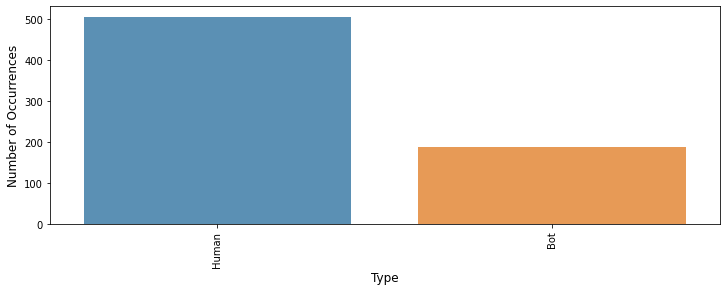

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cnt_pro = df['SourceatBot7'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
# !pip install torch
!pip install transformers
import torch
import transformers as ppb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.7 MB/s 
     |████████████████████████████████| 7.6 MB 50.9 MB/s 
     |████████████████████████████████| 182 kB 42.2 MB/s 


In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
df["Content"]

0      rt dax_x98 ladi gaga 35m covid-19 relief beyon...
1      face covid-19 success medit natur 's real heal...
2      rt murkymoodr idiot would expect shop tj maxx ...
3      rt nicolasturgeon stay home protect nhs save live
4      rt dax_x98 ladi gaga 35m covid-19 relief beyon...
                             ...                        
695    rt scrapperchri bill gate word popul control n...
696    right-wing `` healthcar left marketplac 's mat...
697    rt proudtigerlsu https //www.nola.com/news/cor...
698    rt ryanstruyk us coronavirus death 10 wks ago ...
699    rt dax_x98 ladi gaga 35m covid-19 relief beyon...
Name: Content, Length: 692, dtype: object

In [ ]:
tokenized = df["Content"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = max([len(x) for x in tokenized])
padded = [np.pad(x, (0, max_len - len(x)), 'constant') for x in tokenized]

In [ ]:
input_ids = torch.tensor(np.array(padded))
with torch.no_grad():
    last_hidden_states = model(input_ids)
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
labels = df['SourceatBot7']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 1)

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print('LGR Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('LGR Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('LGR Testing CM: {}\n'.format(confusion_matrix(y_test, y_pred)))

LGR Testing accuracy 0.7553956834532374
LGR Testing F1 score: 0.6835838834985282
LGR Testing CM: [[  4  32]
 [  2 101]]



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print('NB Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('NB Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('NB Testing CM: {}\n'.format(confusion_matrix(y_test, y_pred)))

NB Testing accuracy 0.6115107913669064
NB Testing F1 score: 0.6317618245828869
NB Testing CM: [[18 18]
 [36 67]]



In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print('SVM Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('SVM Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('SVM Testing CM: {}\n'.format(confusion_matrix(y_test, y_pred)))

SVM Testing accuracy 0.7194244604316546
SVM Testing F1 score: 0.6676651371176475
SVM Testing CM: [[ 5 31]
 [ 8 95]]



In [ ]:
X_train

array([[ 0.05938314, -0.09589387,  0.27826855, ...,  0.12004568,
         0.80121744, -0.10567892],
       [ 0.12847696, -0.09433632,  0.2727887 , ...,  0.04987906,
         0.81140053, -0.127398  ],
       [-0.13358183, -0.28939006,  0.12955546, ...,  0.02749288,
         0.60051876,  0.09781475],
       ...,
       [ 0.03473466, -0.1521891 ,  0.24623254, ...,  0.08699366,
         0.7299648 , -0.06751284],
       [ 0.044504  , -0.08914606,  0.24124156, ...,  0.11837529,
         0.8238644 , -0.11469719],
       [-0.18429537, -0.07825994,  0.21716553, ...,  0.06732818,
         0.63012964,  0.14328733]], dtype=float32)